 # 【問題1】各種手法の実行
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。

 - SimpleRNN
 - GRU
 - LSTM
 - ConvLSTM2D
これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。

Keras公式のサンプルコードを利用してください。

LSTMのサンプルコード

keras/imdb_lstm.py at master · keras-team/keras

ConvLSTM2Dのサンプルコード

keras/conv_lstm.py at master · keras-team/keras

このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。全て実行する上での実行時間を考慮した数に設定してください。



 ## LSTMを実装

In [1]:
'''
#Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
**Notes**
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Using TensorFlow backend.
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/naoki/opt/anaconda3/lib/python3.7/sit

Loading data...
17465344/17464789 [==============================] - 2s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train...

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 60s 2ms/step - loss: 0.4624 - accuracy: 0.7847 - val_loss: 0.3723 - val_accuracy: 0.8370
Epoch 2/15
25000/25000 [==============================] - 59s 2ms/step - loss: 0.3033 - accuracy: 0.8760 - val_loss: 0.3787 - val_accuracy: 0.8332
Epoch 3/15
25000/25000 [==============================] - 59s 2ms/step - loss: 0.2119 - accuracy: 0.9199 - val_loss: 0.4154 - val_accuracy: 0.8305
Epoch 4/15
25000/25000 [==============================] - 59s 2ms/step - loss: 0.1524 - accuracy: 0.9444 - val_loss: 0.5368 - val_accuracy: 0.7996
Epoch 5/15
25000/25000 [===========

 ## ConvLSTM2D

Train on 950 samples, validate on 50 samples
Epoch 1/2
950/950 [==============================] - 469s 494ms/step - loss: 0.2743 - val_loss: 0.5762
Epoch 2/2
950/950 [==============================] - 461s 485ms/step - loss: 0.0286 - val_loss: 0.4127


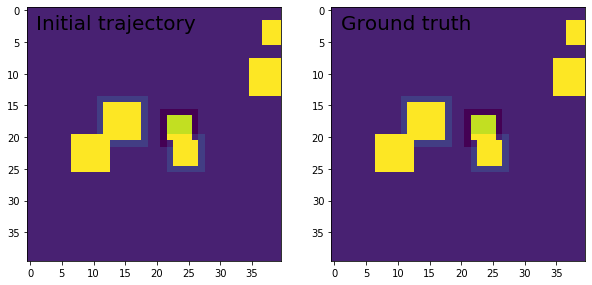

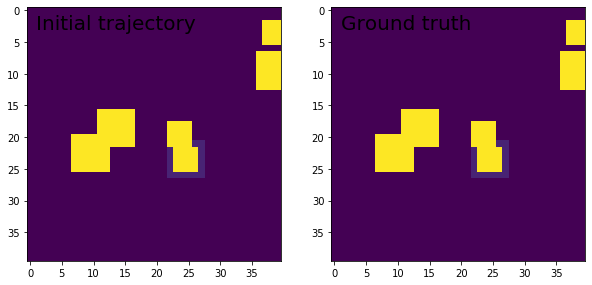

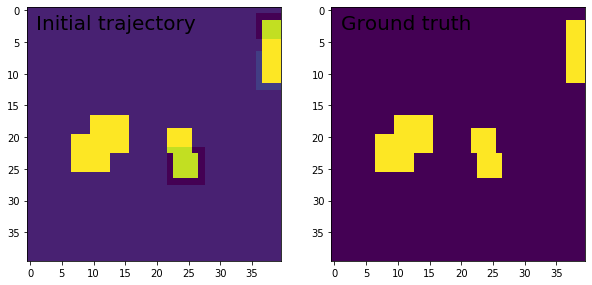

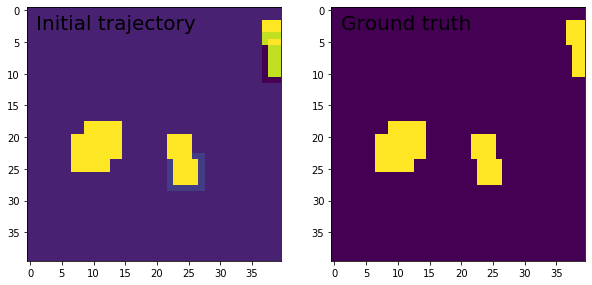

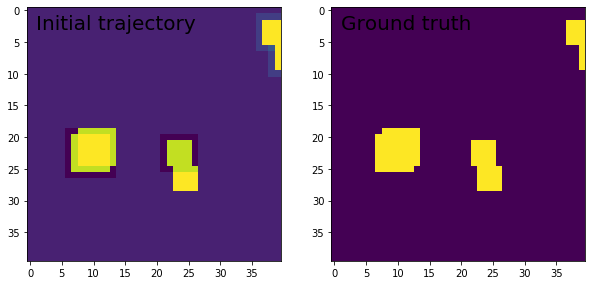

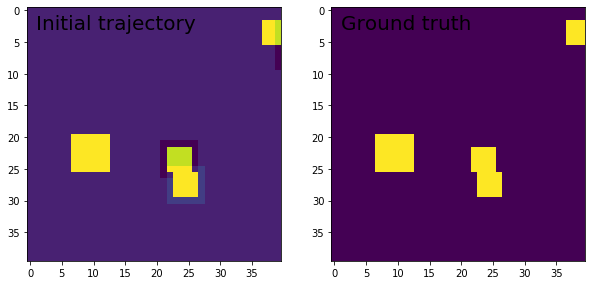

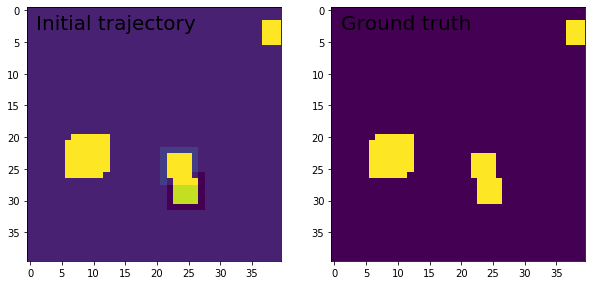

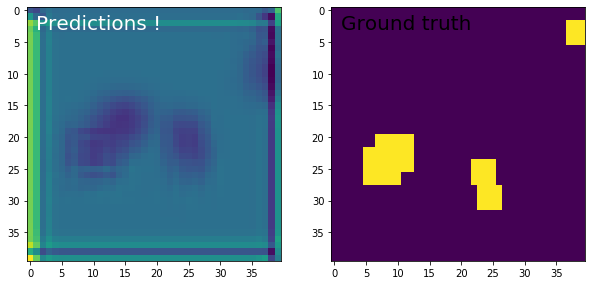

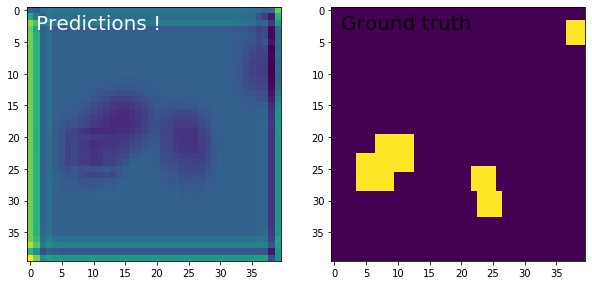

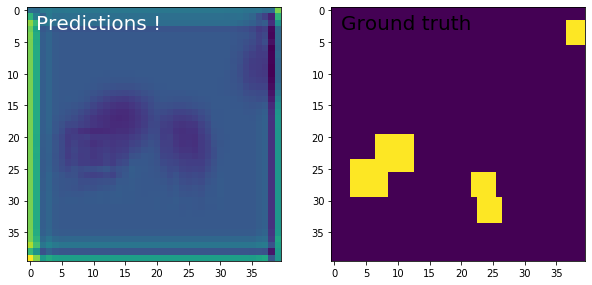

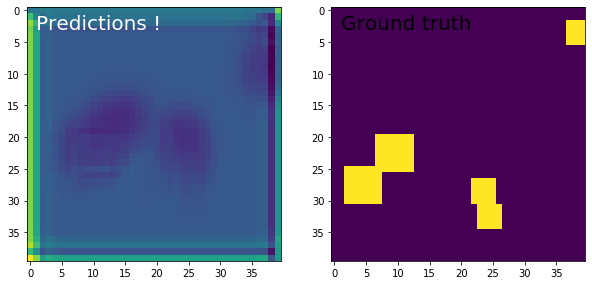

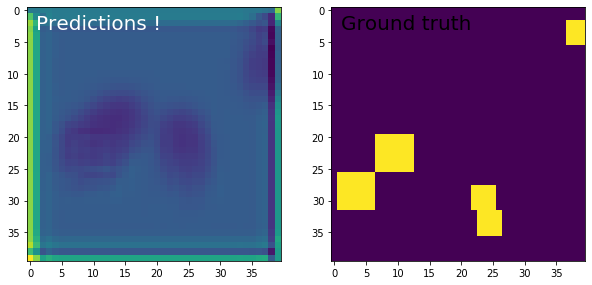

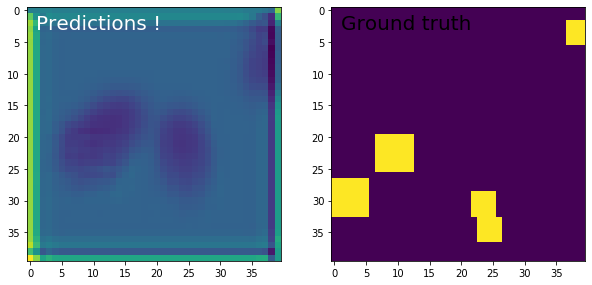

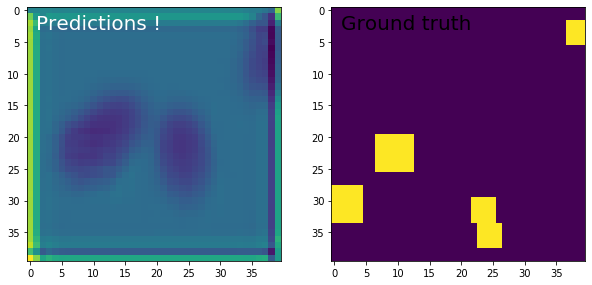

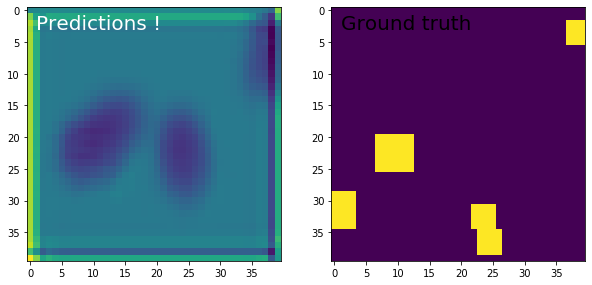

In [3]:
"""
#This script demonstrates the use of a convolutional LSTM network.
This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=2, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

 ## SimpleRNN

In [6]:
from keras.layers.recurrent import SimpleRNN

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 36s 1ms/step - loss: 0.6860 - accuracy: 0.5428 - val_loss: 0.6449 - val_accuracy: 0.6052
Epoch 2/15
25000/25000 [==============================] - 36s 1ms/step - loss: 0.5607 - accuracy: 0.7138 - val_loss: 0.5325 - val_accuracy: 0.7407
Epoch 3/15
25000/25000 [==============================] - 36s 1ms/step - loss: 0.4701 - accuracy: 0.7863 - val_loss: 0.4929 - val_accuracy: 0.7653
Epoch 4/15
25000/25000 [==============================] - 36s 1ms/step - loss: 0.4273 - accuracy: 0.8122 - val_loss: 0.4959 - val_accuracy: 0.7729
Epoch 5/15
25000/25000 [==============================] - 36s 1ms/step - loss: 0.4763 - accuracy: 0.7720 - val_loss: 0.5650 - val_accuracy: 0.7157
Epoch 6/15
25000/25000 [========================

 # GRU

In [7]:
from keras.layers.recurrent import GRU

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 62s 2ms/step - loss: 0.8293 - accuracy: 0.6963 - val_loss: 0.6040 - val_accuracy: 0.6600
Epoch 2/15
25000/25000 [==============================] - 61s 2ms/step - loss: 83.2230 - accuracy: 0.7505 - val_loss: 0.5775 - val_accuracy: 0.6887
Epoch 3/15
25000/25000 [==============================] - 60s 2ms/step - loss: 1.4233 - accuracy: 0.7912 - val_loss: 0.5866 - val_accuracy: 0.6903
Epoch 4/15
25000/25000 [==============================] - 60s 2ms/step - loss: 0.6664 - accuracy: 0.7878 - val_loss: 0.6227 - val_accuracy: 0.6681
Epoch 5/15
25000/25000 [==============================] - 59s 2ms/step - loss: 0.4208 - accuracy: 0.8104 - val_loss: 0.6330 - val_accuracy: 0.6747
Epoch 6/15
25000/25000 [=======================

LSTMのTest accuracyが 0.8077999949455261で最も良かった

 # 【問題3】他のクラスの説明
ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。

 - RNN
 - SimpleRNNCell
 - GRUCell
 - LSTMCell
 - StackedRNNCells
 - CuDNNGRU
 - CuDNNLSTM


 ## RNN
 <br>
  通常のニューラルネットワークでは、ある層の出力は、次の層の入力に利用されるのみである。しかしRNNでは、ある層の出力は、次の層の入力として利用されるだけでなく、一般的なニューラルネットワークの最後の層のような（中間データではないユーザーが利用可能な）出力としても利用される。また、各層の入力として、前の層の入力のみではなく、時系列のデータポイントも入力とする。
 <img src="https://image.itmedia.co.jp/ait/articles/1804/25/di-04-01.gif" alt="エビフライトライアングル" title="サンプル">

 ## SimpleRNNCell
 <br>
 Recursive Neural Networkの中でも、図1のように隠れ層同士の結合が時系列に沿って直線的であり、かつその隠れ層が同一構造のものであるような場合を「RNN」という。これを表現したのが以下の図である。RNNでは、再帰的に出現する同一のネットワーク構造（以下の図中では黒四角で表現される）のことをセル（cell）と呼ぶ。
  <img src="https://image.itmedia.co.jp/ait/articles/1804/25/di-04-02.gif" alt="エビフライトライアングル" title="サンプル">

 ## GRUCell
 GRUとは、LSTMをシンプルにしたゲート付き回帰型ユニット。入力ゲートと忘却ゲートを「更新ゲート」として１つのゲートに統合した構造で、GRUレイヤーのためのCellとしての隠れ層の１単位。

 ## LSTMCell
RNNには長い時系列データを扱うと勾配消失、勾配発散が発生する問題があり、その解決策として、ゲートと呼ばれる情報の取捨選択機能を持ったモデルがLSTMである。そのLSTM隠れ層の１単位。

 ## StackedRNNCells
 RNNセルのスタックが単一セルとして動作できるようにするラッパー。効率的なスタックRNNを実装するために使用される。

 ## CuDNNGRU
 CuDNNとはNVIDIAが公開しているDeep Learning用のソフトウエアを高速化したライブラリである。CuDNNGRUはCuDNNが支援する高速のGRU。

 ## CuDNNLSTM
 同じくCuDNNが支援する高速のLSTM実装。